In [1]:
# Rodar um modelo preditivo encima desta base de dados
# Notem que as ultimas posições estão sem valor são elas que vcs terão que prever

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

c:\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('Dataset/anorectic_exercicio.csv', header=0)
#data = data.drop(columns=['Unnamed: 39','Unnamed: 40','Unnamed: 41'])

print(data.shape)
print(list(data.columns))
data

(768, 9)
['Pregnancies', 'PG Concentration', 'Diastolic BP', 'Tri Fold Thick', 'Serum Ins', 'BMI', 'DP Function', 'Age', 'Diabetes']


,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,Sick
1,1,85,66,29,0,26.6,0.351,31,Healthy
2,8,183,64,0,0,23.3,0.672,32,Sick
3,1,89,66,23,94,28.1,0.167,21,Healthy
4,0,137,40,35,168,43.1,2.288,33,Sick
5,5,116,74,0,0,25.6,0.201,30,Healthy
6,3,78,50,32,88,31.0,0.248,26,Sick
7,10,115,0,0,0,35.3,0.134,29,Healthy
8,2,197,70,45,543,30.5,0.158,53,Sick
9,8,125,96,0,0,0.0,0.232,54,Sick


In [4]:
# separar os dados 'NaN'
data_pred = data.tail(19)

# drop 'NaN' no dataset para traino e test
data = data.dropna()
print(data.shape)
data

(749, 9)


,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,Sick
1,1,85,66,29,0,26.6,0.351,31,Healthy
2,8,183,64,0,0,23.3,0.672,32,Sick
3,1,89,66,23,94,28.1,0.167,21,Healthy
4,0,137,40,35,168,43.1,2.288,33,Sick
5,5,116,74,0,0,25.6,0.201,30,Healthy
6,3,78,50,32,88,31.0,0.248,26,Sick
7,10,115,0,0,0,35.3,0.134,29,Healthy
8,2,197,70,45,543,30.5,0.158,53,Sick
9,8,125,96,0,0,0.0,0.232,54,Sick


In [5]:
# converter dados para binarios
data = data.replace(to_replace='Sick', value='0')
data = data.replace(to_replace='Healthy', value='1')

# converter os dados para float
data = data.astype('float64')
print(data.shape)
data

(749, 9)


,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,1.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,1.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,0.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,1.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,0.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,0.0


In [6]:
'''# Create dummy variables
cat_vars=['Pregnancies', 'PG Concentration', 'Diastolic BP', 'Tri Fold Thick', 'Serum Ins', 'BMI', 'DP Function', 'Age', 'Diabetes']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['Pregnancies', 'PG Concentration', 'Diastolic BP', 'Tri Fold Thick', 'Serum Ins', 'BMI', 'DP Function', 'Age', 'Diabetes']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]'''

"# Create dummy variables\ncat_vars=['Pregnancies', 'PG Concentration', 'Diastolic BP', 'Tri Fold Thick', 'Serum Ins', 'BMI', 'DP Function', 'Age', 'Diabetes']\nfor var in cat_vars:\n    cat_list='var'+'_'+var\n    cat_list = pd.get_dummies(data[var], prefix=var)\n    data1=data.join(cat_list)\n    data=data1\n\ncat_vars=['Pregnancies', 'PG Concentration', 'Diastolic BP', 'Tri Fold Thick', 'Serum Ins', 'BMI', 'DP Function', 'Age', 'Diabetes']\ndata_vars=data.columns.values.tolist()\nto_keep=[i for i in data_vars if i not in cat_vars]"

In [7]:
# final data columns
data_final=data
data_final.columns.values

array(['Pregnancies', 'PG Concentration', 'Diastolic BP',
       'Tri Fold Thick', 'Serum Ins', 'BMI', 'DP Function', 'Age',
       'Diabetes'], dtype=object)

In [8]:
data_final_vars=data_final.columns.values.tolist()
y=['Diabetes']
X=[i for i in data_final_vars if i not in y]

In [9]:
# Feature Selection (Recursive Feature Elimination (RFE))
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


c:\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
cols=["Pregnancies", "PG Concentration", 
      "Diastolic BP", "Tri Fold Thick", 
      "Serum Ins", "BMI", "DP Function", "Age"]

X=data_final[cols]
y=data_final['Diabetes']

In [11]:
'''# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())'''

'# Implementing the model\nimport statsmodels.api as sm\nlogit_model=sm.Logit(y,X)\nresult=logit_model.fit()\nprint(result.summary2())'

In [12]:
# Logistic Regression Model Fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# accuracy of training
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [14]:
# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 10, random_state = 7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv = kfold, scoring = scoring)
print("10-fold cross validation average accuracy: %.3f" %(results.mean()))

10-fold cross validation average accuracy: 0.748


In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 41  32]
 [ 11 141]]


In [16]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.56      0.66        73
        1.0       0.82      0.93      0.87       152

avg / total       0.81      0.81      0.80       225



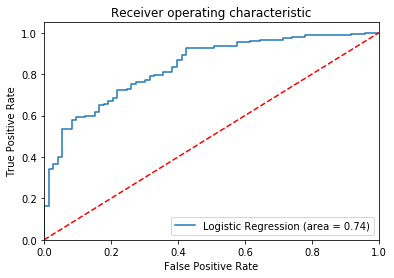

In [17]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.savefig('anorectic_exercise1')
plt.show()

In [18]:
# dropar coluna diabete para gerar resultado de predição
data_pred = data_pred.drop(columns=['Diabetes'])

# resultado de predição
y_predicted = logreg.predict(data_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [19]:
# resetar index
data_pred = data_pred.reset_index()
data_pred

# converter em DataFrame a predição
y_predicted = pd.DataFrame({'Diabetes': y_predicted})

# concatena os dados
data_result = pd.concat([data_pred,y_predicted], axis=1)
data_result.to_excel('anorectic_data_result.xlsx','Sheet1')
data_result

,index,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
0,749,6,162,62,0,0,24.3,0.178,50,0.0
1,750,4,136,70,0,0,31.2,1.182,22,0.0
2,751,1,121,78,39,74,39.0,0.261,28,1.0
3,752,3,108,62,24,0,26.0,0.223,25,1.0
4,753,0,181,88,44,510,43.3,0.222,26,0.0
5,754,8,154,78,32,0,32.4,0.443,45,0.0
6,755,1,128,88,39,110,36.5,1.057,37,1.0
7,756,7,137,90,41,0,32.0,0.391,39,1.0
8,757,0,123,72,0,0,36.3,0.258,52,1.0
9,758,1,106,76,0,0,37.5,0.197,26,1.0
